In [1]:
import pandas as pd, matplotlib.pyplot as plt

In [2]:
weather_data = pd.read_csv('weather_2012-16_data.csv.csv', index_col = 2, parse_dates = True) 

bike_data = pd.read_csv('fremont_2012-15_bike_data.csv.csv', index_col = 0, parse_dates = True)

# The indices for both dataframes has been changed to the date.

In [3]:
weather_data = weather_data.sort_index() # Sorted by date

In [4]:
bike_data = bike_data.sort_index() # Sorted by date

In [5]:
%matplotlib inline 
# Prints plots inline

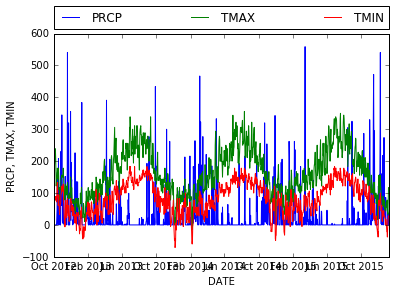

In [6]:
# Creating a plot of precipitation, maximum and minimum temperatures over the given time

y1, y2, y3 = weather_data['PRCP'], weather_data['TMAX'], weather_data['TMIN']

plt.plot(y1, label = 'PRCP')
plt.plot(y2, label = 'TMAX')
plt.plot(y3, label = 'TMIN')

plt.xlabel('DATE')
plt.ylabel('PRCP, TMAX, TMIN')
plt.legend( bbox_to_anchor = (0., 1.02, 1., .102), loc = 2, ncol = 3, mode = "expand", borderaxespad = 0.)

In [7]:
daily_bike_data = bike_data.resample(rule = 'D', how = 'sum', closed = 'left', label = 'left') 
# Creating daily totals from hourly info

daily_bike_data['ride_count'] = daily_bike_data['fremont_bridge_nb'] + daily_bike_data['fremont_bridge_sb'] 
# Total ride count (NB + SB) for every day

In [8]:
daily_bike_data 

,fremont_bridge_nb,fremont_bridge_sb,ride_count
date,,,
2012-10-03,1,1,2
2012-10-04,NaN,NaN,NaN
2012-10-05,22,22,44
2012-10-06,NaN,NaN,NaN
2012-10-07,9,9,18
2012-10-08,2,2,4
2012-10-09,73,73,146
2012-10-10,65,65,130
2012-10-11,135,135,270


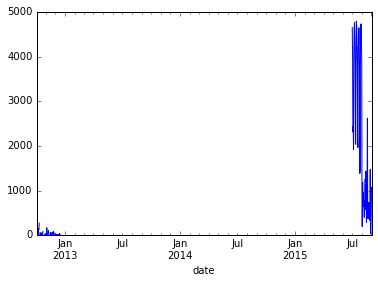

In [9]:
daily_bike_data['ride_count'].plot() # Plotting daily bike ride counts vs Date

In [10]:
# This plot doesn't give us useful information as it is discontinuous in 2014,
# So we can choose to visualize only the 2015 data from June onward

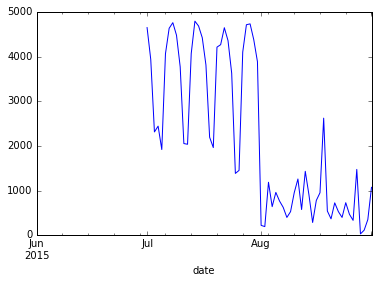

In [11]:
times = pd.DatetimeIndex(daily_bike_data.index) # Extracting Datetime info from the daily bike data

bike_data_2015 = daily_bike_data[times.year == 2015] # 2015 daily bike data

times_2015 = pd.DatetimeIndex(bike_data_2015.index) # Extracting Datetime info from the 2015 daily bike data

bd_2015_yearend = bike_data_2015[times_2015.month >= 6] # Extracting post-May bike data in 2015

bd_2015_yearend['ride_count'].plot() # Plotting daily ride counts vs Date from June 2015 onwards

In [12]:
# The dataframes weather_data and daily_bike_data are of importance to us

In [13]:
mega_data = weather_data.join(daily_bike_data) # joining the weather and bike dataframes

In [14]:
mega_data

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT22,WT04,WT13,WT16,WT08,WT18,WT03,fremont_bridge_nb,fremont_bridge_sb,ride_count
DATE,,,,,,,,,,,,,,,,,,,,,
2012-10-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,233,89,30,40,30,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2012-10-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,178,100,41,10,20,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2012-10-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,189,78,73,10,20,...,0,0,0,0,0,0,0,1,1,2
2012-10-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,189,83,65,20,20,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2012-10-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,217,89,57,360,360,...,0,0,0,0,0,0,0,22,22,44
2012-10-06,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,239,78,51,20,20,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2012-10-07,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,239,78,13,30,10,...,0,0,0,0,0,0,0,9,9,18
2012-10-08,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,211,78,19,210,230,...,0,0,0,0,0,0,0,2,2,4
2012-10-09,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,161,89,16,170,170,...,0,0,1,0,0,0,0,73,73,146


In [15]:
"""
Weather measurements parameter info:

PRCP = Precipitation (mm *10)
SNOW = Snowfall (mm)
SNWD = Snow depth (mm)
TMAX = Maximum temperature(Degrees C *10)
TMIN = Minimum temperature(Degrees C *10)
AWND = Average daily wind speed (m/s *10)
WDF2 = Direction of fastest 2-minute wind (degrees)
WDF5 = Direction of fastest 5-second wind (degrees)
WSF2 = Fastest 2-minute wind speed (tenths of meters per second)
WSF5 = Fastest 5-second wind speed (tenths of meters per second)
WT01 = Fog, ice fog, or freezing fog (may include heavy fog)
WT02 = Heavy fog or heaving freezing fog (not always distinguished from fog)
WT03 = Thunder
WT04 = Ice pellets, sleet, snow pellets, or small hail 
WT05 = Hail (may include small hail)
WT08 = Smoke or haze
WT13 = Mist
WT14 = Drizzle
WT16 = Rain (may include freezing rain, drizzle, and freezing drizzle)
WT18 = Snow, snow pellets, snow grains, or ice crystals
WT22 = Ice fog or freezing fog """;

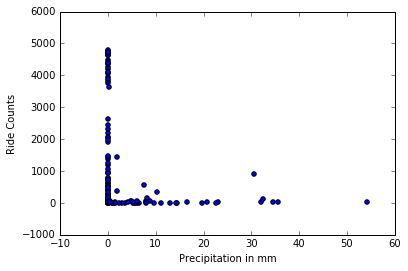

In [16]:
x1, x2, x3 = mega_data['PRCP'], mega_data['TMAX'], mega_data['TMIN']

y = mega_data['ride_count']

plt.scatter(x1/10, y)
plt.ylabel('Ride Counts')
plt.xlabel('Precipitation in mm')

# From the following plot, we infer that bikers generally do not prefer to ride on a rainy day. 
# We see more bike rides on a dry day

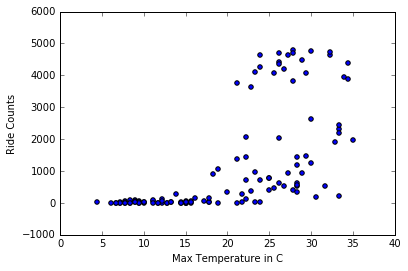

In [17]:
plt.scatter(x2/10, y)

plt.ylabel('Ride Counts')
plt.xlabel('Max Temperature in C')

# From the following plot, we can infer that riders prefer to ride on a warm day

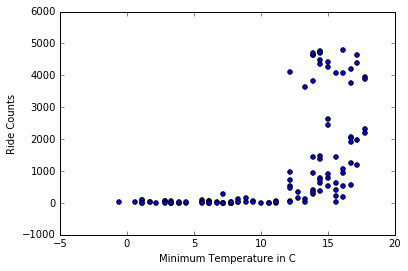

In [18]:
plt.scatter(x3/10, y)

plt.ylabel('Ride Counts')
plt.xlabel('Minimum Temperature in C')

# From the following plot, we can infer that riders prefer to ride on a warm day

' From the following plot we can infer that bikers never ride on a snowy day or ride data does not exist for snow days.'

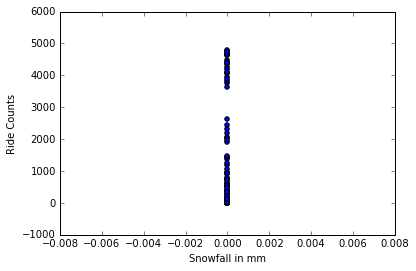

In [19]:
x4 = mega_data['SNOW']

plt.scatter(x4, y)

plt.ylabel('Ride Counts')
plt.xlabel('Snowfall in mm')

""" From the following plot we can infer that bikers never ride on a snowy day or ride data does not exist for snow days."""

In [20]:
mega_data.to_csv('mega_data.csv')

' Though there is no clear trend in the ride counts, \nwe can observe a generally inverse relationship between ride counts and wind speed.\nThis means that more bikers head out on a less windy day'

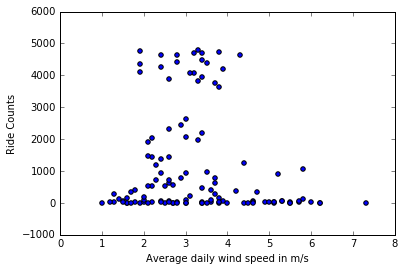

In [21]:
x5 = mega_data['AWND']

plt.scatter(x5/10, y)

plt.ylabel('Ride Counts')
plt.xlabel('Average daily wind speed in m/s')

""" Though there is no clear trend in the ride counts, 
we can observe a generally inverse relationship between ride counts and wind speed.
This means that more bikers head out on a less windy day"""

' There is clear trend here. The presence of fog decreases the number of rides, as denoted by the downward sloping plot'

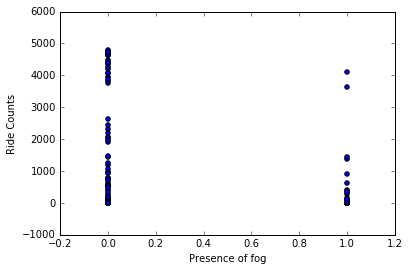

In [22]:
x6 =  mega_data['WT01']

plt.scatter(x6, y)

plt.ylabel('Ride Counts')
plt.xlabel('Presence of fog')

""" There is clear trend here. The presence of fog decreases the number of rides, as denoted by the downward sloping plot"""

' There is no clear relationship between ride counts and rain of all kinds'

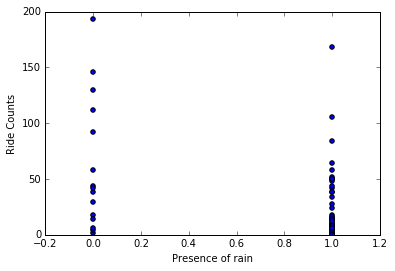

In [23]:
x7 = mega_data['WT16']

plt.scatter(x7, y)

plt.ylabel('Ride Counts')
plt.xlabel('Presence of rain')
axes = plt.gca()
axes.set_ylim([0,200])

""" There is no clear relationship between ride counts and rain of all kinds"""

' There is no clear relationship between ride counts and mist'

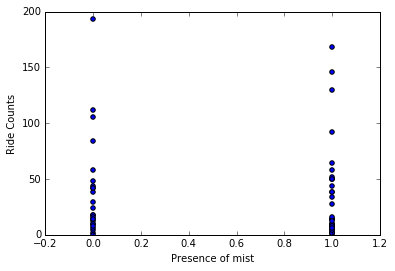

In [24]:
x8 = mega_data['WT13']

plt.scatter(x8, y)

plt.ylabel('Ride Counts')
plt.xlabel('Presence of mist')
axes = plt.gca()
axes.set_ylim([0,200])

""" There is no clear relationship between ride counts and mist"""

In [26]:
"""
In general, poor weather signifies fewer bike rides, as seen from the plots we've made.
Other factors that could affect the number of bike riders on the Fremont Bridge are:

1. Public holidays, when bikers may tend to sit at home, such as on Thanksgiving or Christmas.
2. Bridge blockoffs for maintenance, diverting the riders elsewhere.
3. The Fremont Bridge opens an average of 35 times a day, 
    which makes it the most frequently opened drawbridge in the United States 
    and one of the busiest bascule bridges in the world.
    Number of openings a day can GREATLY affect the number of riders
4. Gas prices. Lower prices may decrease the number of riders and high gas prices may encourage more people to use their bikes.
5. Intensity of daylight and cloud cover.
6. Population density variations in Fremont and surrounding area.

These factors may be worth exploring in the future. """ ;